In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("umitka/synthetic-financial-fraud-dataset")

print("Path to dataset files:", path)

100%|██████████| 367k/367k [00:00<00:00, 705kB/s]

Extracting files...
Path to dataset files: C:\Users\davee\.cache\kagglehub\datasets\umitka\synthetic-financial-fraud-dataset\versions\1


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Load dataset
df = pd.read_csv("synthetic_fraud_dataset.csv")

# Drop identifier columns
df = df.drop(["transaction_id", "user_id"], axis=1)

# Separate features and target
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

In [43]:
# Identify categorical and numeric columns
categorical_cols = ["transaction_type", "merchant_category", "country"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing: One-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

In [44]:
# Model
model = RandomForestClassifier()

# Pipeline
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [45]:
# Train
clf.fit(X_train, y_train)

# Evaluate
print("Train accuracy:", clf.score(X_train, y_train))
print("Test accuracy:", clf.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 1.0


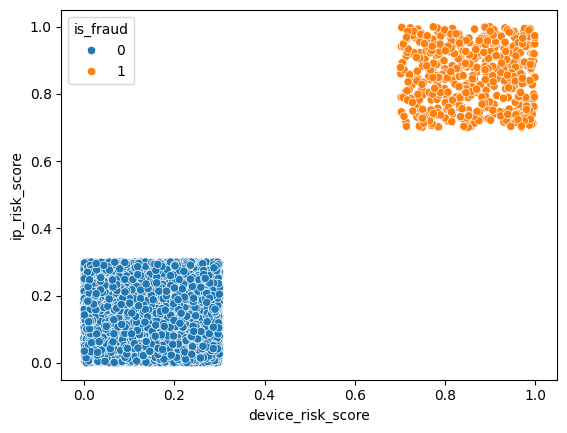

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="device_risk_score", y="ip_risk_score", hue="is_fraud")
plt.show()
